In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import golden

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))

car = pd.read_csv('carsharing.csv', sep=';', index_col=0, decimal=',') #Attributo decimal per sostituire le virgole con i punti

In [2]:
###ESERCIZIO 3

In [3]:
#DOMANDA 1: Quanti casi contiene il file?
len(car)

392

In [4]:
#DOMANDA 2.1: Il carattere TimeFrame è nominale, ordinale o scalare?
len(car['TimeFrame'].unique()) #Nominale se non si ordinano utilizzando l'alfabeto, altrimenti ordinale

5

In [5]:
#DOMANDA 2.2: In quante fasce orarie è stata suddivisa una giornata?
#RISPOSTA 2.2: 5

In [6]:
#DOMANDA 2.3: In quali fasce orarie il servizio è stato utilizzato maggiormente?
car['TimeFrame'].value_counts() #RISPOSTA 2.3: FRAME B, FRAME C...

FRAME B    123
FRAME C    107
FRAME D     94
FRAME A     47
FRAME E     21
Name: TimeFrame, dtype: int64

In [7]:
#DOMANDA 2.4: Calcolate la tabella delle frequenze congiunte di TimeFrame e RushHour
freq_cong = pd.crosstab(index=car['TimeFrame'],columns=car['RushHour'])
freq_cong

RushHour,0,1
TimeFrame,,
FRAME A,47,0
FRAME B,0,123
FRAME C,107,0
FRAME D,0,94
FRAME E,21,0


In [8]:
#DOMANDA 2.5: Leggendo la tabella precedente determinare le fasce orarie delle ore di punta
#RISPOSTA 2.5: Frame B e Frame D sono corrispondenti alle ore di punta
freq_cong[1][freq_cong[1] != 0].index

Index(['FRAME B', 'FRAME D'], dtype='object', name='TimeFrame')

In [9]:
#DOMANDA 3.1: Quanti sono i clienti premium?
premium = car[car['PremiumCustomer']>0]
len(premium) #RISPOSTA 3.1: 227

227

In [10]:
#DOMANDA 3.2: Calcolare distanza media percorsa in un tragitto da un cliente premium
distance = premium['Distance']
distance.mean()

8.437444933920705

In [11]:
#DOMANDA 4.1: Il carattere Distance è nominale, ordinale o scalare?
#RISPOSTA 4.1: Il carattere Distance è scalare

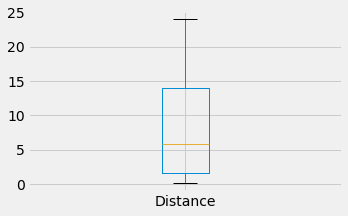

In [12]:
#DOMANDA 4.2: Tracciare il Boxplot di tale carattere
car['Distance'].plot.box(whis='range')
plt.show()

In [34]:
#DOMANDA 4.3: Determinare gli indici di centralità e di dispersione
print(car['Distance'].describe())
print("IQR:    ", car.loc[:,"Distance"].quantile(0.75)-car.loc[:,"Distance"].quantile(0.25))

count    392.000000
mean       7.858673
std        6.805123
min        0.100000
25%        1.575000
50%        5.750000
75%       14.025000
max       24.000000
Name: Distance, dtype: float64
IQR:     12.45


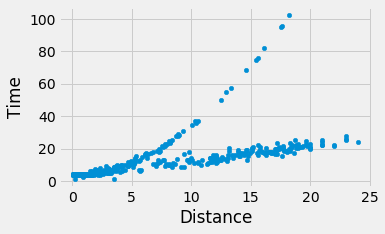

In [14]:
#DOMANDA 4.4: Si riscontra una relazione tra la distanza percorsa e il tempo?
car.plot.scatter('Distance','Time')
plt.show()
#RISPOSTA 4.4: Non c'è una relazione tra distanza percorsa e il tempo

In [15]:
#DOMANDA 4.5: Calcolare l'indice di correlazione
car['Distance'].corr(car['Time']) 
#RISPOSTA 4.5: Il valore ottenuto indica che c'è una minima relazione diretta
#Ho molti valori concentrati nella parte bassa del grafico
#L'indice di correlazione varia da -1 a 1 e descrive rispettivamente una relazione inversa se -1 e una relazione diretta se 1
#Vale 0 se non c'è una relazione

0.6273992247694647

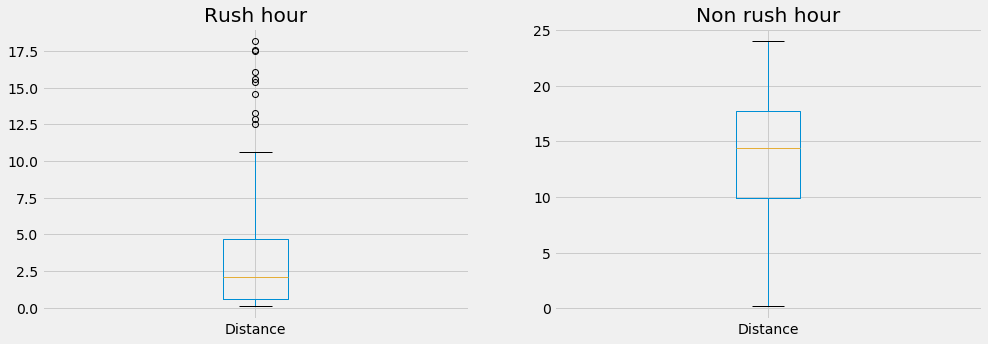

In [36]:
#DOMANDA 4.6: Tracciare il Boxplot della distanza nel caso di utilizzo in orari di punta e non di punta
fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)

rushhour = car[car['RushHour']==1]
nrushhour = car[car['RushHour']==0]
distancerh = rushhour['Distance']
distancenrh = nrushhour['Distance']
distancerh.plot.box(ax=ax[0],title="Rush hour")
distancenrh.plot.box(ax=ax[1],title="Non rush hour")
plt.show()

In [17]:
#DOMANDA 4.7: Ispezionare il grafico sopra e dire se negli orari di punta sono privilegiati tragitti brevi o lunghi
#RISPOSTA 4.7: Il box plot Rush Hour indica che per gli orari di punta sono privilegiati tragitti brevi

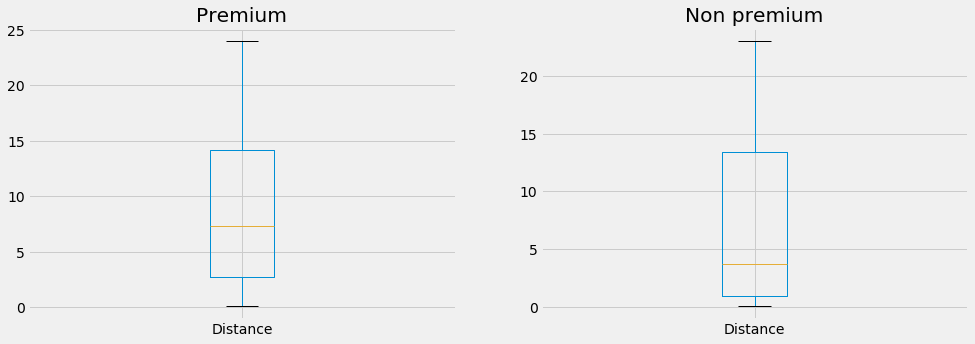

In [18]:
#DOMANDA 4.8: Tracciare il Boxplot della distanza nel caso di Premium e non Premium
fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
nonpremium = car[car['PremiumCustomer']<0]
distancenp = nonpremium['Distance']
distance.plot.box(whis='range',ax=ax[0],title="Premium")
distancenp.plot.box(whis='range',ax=ax[1],title="Non premium")
plt.show()

In [19]:
#DOMANDA 4.9: Ispezionando i grafici ottenuti sopra, notate una grossa differenza nelle distanze percorse dai clienti dei due gruppi?
#RISPOSTA 4.9: I clienti premium percorrono solitamente tragitti più lunghi

In [20]:
#DOMANDA 4.10: La distanza percorsa dipende dal fatto che l’utente sia un cliente Premium/non-Premium oppure dal fatto che l’utilizzo è avvenuto in orario Rush/non-Rush?
#RISPOSTA 4.10: Potrebbe essere riferito a RushHour in quanto la prima metà del grafico indica che moltissime persone percorrono tragitti brevi

In [21]:
#DOMANDA 4.11: Calcolare la distanza media nei 2 gruppi di orario
car[car['RushHour']==1]['Distance'].mean(), car[car['RushHour']==0]['Distance'].mean()
#RISPOSTA 4.11: La media della distanza è molto minore quando la RushHour = 1

(3.3193548387096796, 13.487428571428563)

In [22]:
#DOMANDA 4.12: Calcolare la varianza 'within groups' e la varianza 'between groups', sempre nei 2 gruppi di orario
def anova(groups):
    all_elements = pd.concat(groups)
    
    sum_total = sum((all_elements - all_elements.mean())**2)
    sum_within = sum([sum((g - g.mean())**2) for g in groups])
    
    sum_between = sum([len(g) * (g.mean()-all_elements.mean())**2
                       for g in groups])
    assert(np.abs(sum_total - sum_within - sum_between) < 10**-5)
    n = len(all_elements)
    total_var = sum_total / (n-1)
    within_var = sum_within / (n-len(groups))
    
    return (total_var, within_var*(n-len(groups))/(n-1))

x = anova([car[car['RushHour']==1]['Distance'],car[car['RushHour']==0]['Distance']])
within = x[1]
between = x[0]-x[1]
within, between

(20.693634405459225, 25.616059994039727)

In [23]:
###ESERCIZIO 4

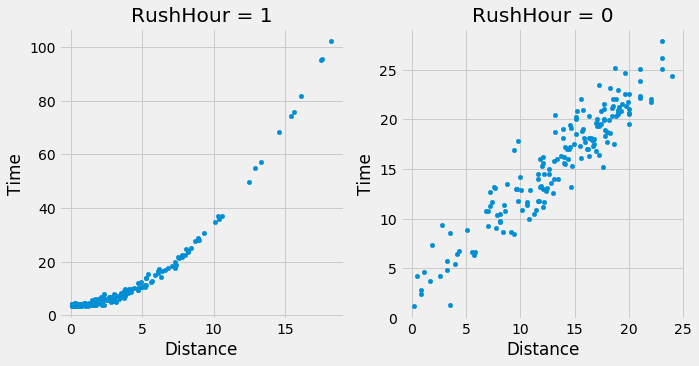

In [42]:
#DOMANDA 1: Tracciate un grafico rappresentativo della distribuzione della distanza percorsa negli orari di punta
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
plot0 = car.loc[car.RushHour == 1,:].plot.scatter(x="Distance",y="Time",ax = ax[0], title="RushHour = 1")
plot1 = car.loc[car.RushHour == 0,:].plot.scatter(x="Distance",y="Time",ax = ax[1], title="RushHour = 0")

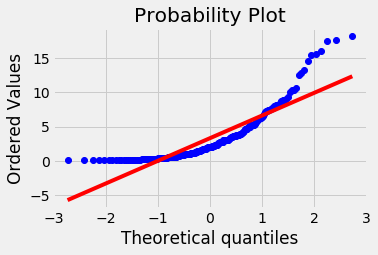

In [44]:
#DOMANDA 2: Segue una legge normale?
import scipy.stats as stats
plot = stats.probplot(car.loc[car.RushHour == 1,"Distance"], dist="norm", plot=plt)
#RISPOSTA 2: La distribuzione delle distanze sembra essere più esponenziale

In [26]:
#DOMANDA 3: Calcolate la media e la deviazione standard della distanza negli orari di punta
distancerh.mean(), distancerh.std()

(3.3193548387096796, 3.711106147915895)

In [27]:
###ESERCIZIO 5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f743ee5c510>]],
      dtype=object)

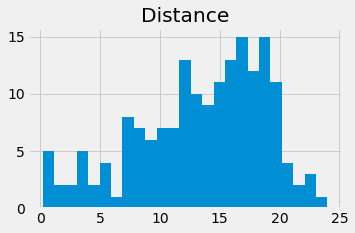

In [62]:
#DOMANDA 1: Tracciate un grafico opportuno che descriva la distanza percorsa negli orari non di punta
pd.DataFrame.hist(car[car['RushHour']==0], column="Distance", bins=25)

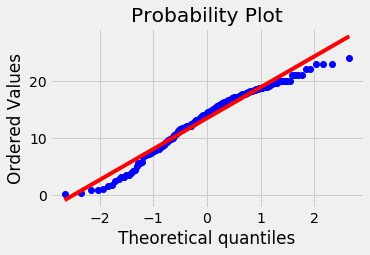

In [63]:
#DOMANDA 2: Segue una legge normale?
plot = stats.probplot(car.loc[car.RushHour == 0,"Distance"], dist="norm", plot=plt)
#RISPOSTA 2: Ci si avvicina ma non si direbbe

In [30]:
#DOMANDA 3: Calcolate media e la mediana della distanza negli orari non di punta
distancenrh.mean(), distancenrh.median()
#RISPOSTA 3: Segue una legge normale perchè i valori sono molto simili

(13.487428571428563, 14.4)

In [31]:
###ESERCIZIO 6

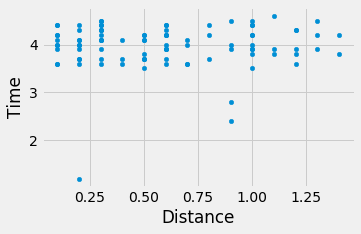

In [32]:
#DOMANDA 1: Tracciate il grafico di dispersione della distanza e del tempo
tragittibrevi = car[car['Distance'] < 1.5]
tragittibrevi.plot.scatter('Distance','Time')
plt.show()

In [67]:
#DOMANDA 2: Commentate il grafico che avete tracciato al punto precedente, possibilmente collegandolo al valore assunto dall’indice di variazione per il carattere Time
print("Deviazione standard  :",tragittibrevi['Time'].std())
print("Media                :",tragittibrevi['Time'].mean())
print("Indice di variazione :",tragittibrevi['Time'].std()/tragittibrevi['Time'].mean())
#RISPOSTA 2: Il tempo per tragitti brevi è praticamente costante.  
#Questo lo si riscontra anche nel coefficiente di variazione che assume un valore particolarmente basso. 

Deviazione standard  : 0.45571311722074287
Media                : 3.9755319148936143
Indice di variazione : 0.1146294702134061
